In [2]:
# Basic usage

import numpy as np
from XyGen import XyGen

'''
seed: random seed for generating irrelevant variables 
n_obs: number of instances
n_I: number of irrelevant features
csv_file: name of the csv file that stores the (X,y) data (optional)
We recommend to keep the default values for reproducibility.
'''

data_generator = XyGen()
X1, y1 = data_generator.gen_ORAND(n_obs=50, n_I=92, csv_file='orand.csv')
X2, y2 = data_generator.gen_LED(csv_file='led.csv')

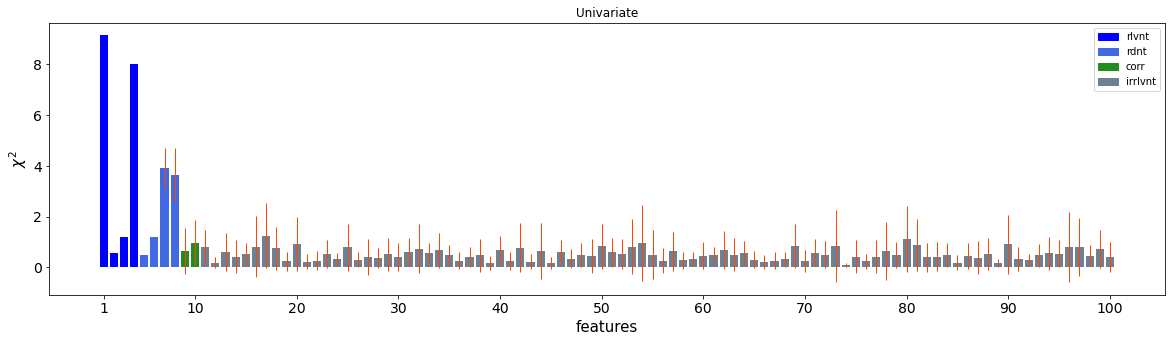

In [3]:
# Feature selection with XyGen

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Generate ORAND with different seeds which changes the irrelevant variables but keeps the relevant variables fixed
# Calculate the total chi2-score for each feature

best_scores = []
for i in range(10):
    data_generator = XyGen(seed=i)
    X, y = data_generator.gen_ORAND(n_obs=30, csv_file='orand.csv')
    sel_kbest = SelectKBest(chi2, k=1)
    sel_kbest = sel_kbest.fit(X, y)
    best_scores.append(sel_kbest.scores_)

#Plot the results
plt.figure(figsize=(20,5))
mean_scores = np.array(best_scores).mean(axis=0)
sd_scores = np.array(best_scores).std(axis=0)
plt.bar(range(1, X.shape[1]+1),mean_scores, yerr=sd_scores, ecolor='orangered', 
        color=4*["blue"]+4*["royalblue"]+2*["forestgreen"]+90*["slategray"],
        error_kw=dict(lw=1))
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], size=14)
plt.yticks(size=14)
plt.xlabel('features', size=15)
plt.ylabel(r'$\chi^2$', size=15)
plt.title('Univariate')

colors = {'rlvnt':'blue', 'rdnt':'royalblue', 'corr':'forestgreen', 'irrlvnt':'slategray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()